# Installing the required libraries

In [3]:
!pip install pandas numpy matplotlib nltk scikit-learn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/52/11/9eac327a38834f162b8250aab32a6781339c69afe7574368fffe46387edf/pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/8d/29/076999b69bd9264b8df5e56f2be18da2de6b2a2d0e10737e5307592e01de/numpy-2.2.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.2.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c7/8b/92e9da1f28310a1f6572b5c55097b0c0ceb5e27486d85fb73b54f5a9b939/matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06

# Importing the required libraries

In [143]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy

In [144]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /Users/sara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the text data

In [210]:
# Load the corpus: return a list of text data and a list of filenames
def load_corpus(folder_path):
    corpus = []
    filenames = []
    for filename in os.listdir(folder_path):
        try:
            if filename.endswith(".txt"):
                with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                    corpus.append(file.read())
                    filenames.append(filename)
        except:
            print(f'Error reading file: {filename}')
    return corpus, filenames

In [211]:
folder_path = 'books'
corpus, filenames = load_corpus(folder_path)

In [212]:
print(f"Number of documents: {len(corpus)}")

Number of documents: 15


# Topic Modeling 1

## Vectorizing the text data

In [213]:
tf_vectorizer = CountVectorizer(encoding='utf-8', lowercase=True, max_df=0.95, min_df=3, max_features=2500)
corpus_vectorized = tf_vectorizer.fit_transform(corpus)

In [214]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [215]:
print(f"Number of features: {len(tf_feature_names)}")
print(f"First 10 features: {tf_feature_names[:10]}")
print(f"Last 10 features: {tf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['000' '10' '100' '11' '12' '15' '30' '_the' 'abandoned' 'above']
Last 10 features: ['yellow' 'yes' 'yesterday' 'you' 'young' 'younger' 'your' 'yours'
 'yourself' 'youth']


## Training the LDA model

In [216]:
lda = LatentDirichletAllocation(n_components=4, random_state=0, learning_method='online')
lda.fit(corpus_vectorized)

LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=0)

## Visualizing the topics

In [217]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

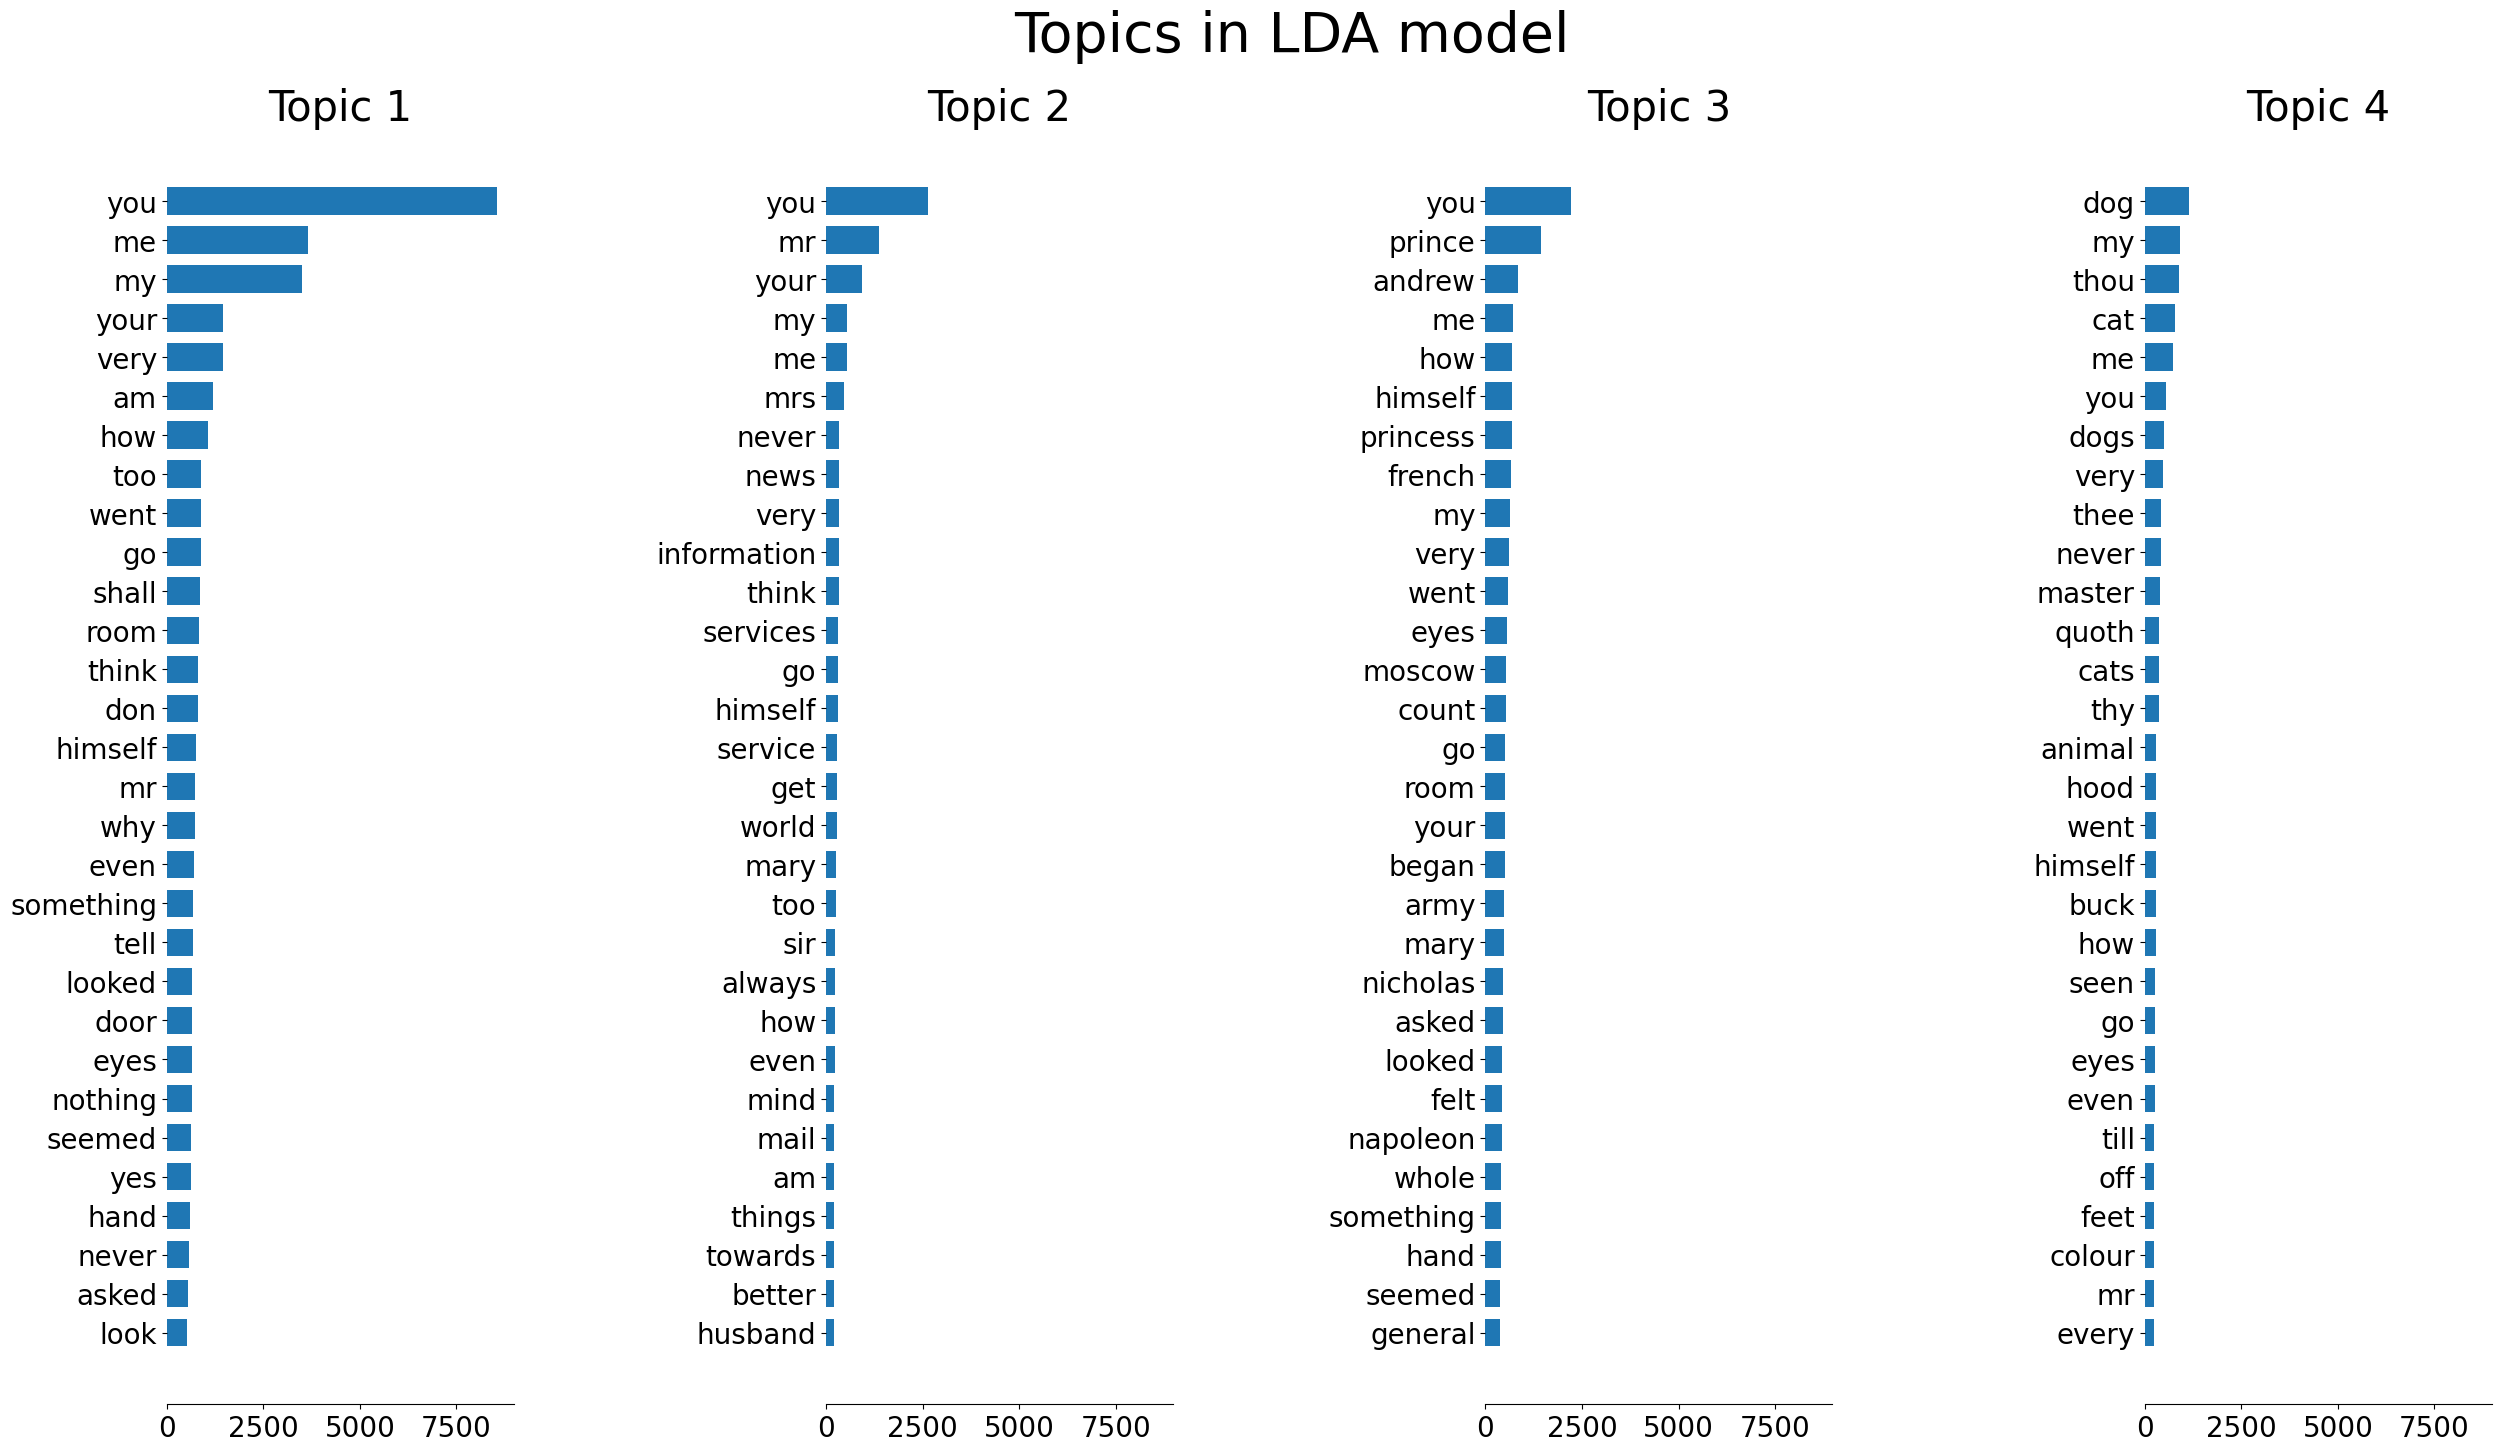

In [218]:
n_top_words = 30
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [223]:
# document topic distribution
doc_topic_dist = lda.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.999198  0.000777  0.000013  0.000013            the_murder.txt
1   0.000009  0.000009  0.000009  0.999974            Robin hood.txt
2   0.000015  0.017155  0.963085  0.019745          how it works.txt
3   0.000089  0.021281  0.000090  0.978540               mammals.txt
4   0.090794  0.000002  0.909203  0.000002           warandpeace.txt
5   0.000011  0.999967  0.000011  0.000011      the online world.txt
6   0.988224  0.004269  0.000009  0.007498       sherlock holmes.txt
7   0.999987  0.000004  0.000005  0.000004  crime and punishment.txt
8   0.285706  0.441093  0.122469  0.150732       sothern_horrors.txt
9   0.038591  0.000036  0.039967  0.921406  the call of the wild.txt
10  0.986504  0.000006  0.000006  0.013484               dracula.txt
11  0.000015  0.020438  0.000015  0.979532              our_cats.txt
12  0.000009  0.000270  0.000009  0.999713     anecdotes of dogs.txt
13  0.163631  0.000027  0.001033  

# Topic Modeling 2: Removing stopwords

## Preprocessing the text data

In [224]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word.lower() for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [225]:
corpus_preprocessed = [preprocess_text(text) for text in corpus]

In [226]:
len(corpus_preprocessed[1])

403795

## Vectorizing the preprocessed text data

In [227]:
corpus_vectorized = tf_vectorizer.fit_transform(corpus_preprocessed)

In [228]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [229]:
print(f"Number of features: {len(tf_feature_names)}")
print(f"First 10 features: {tf_feature_names[:10]}")
print(f"Last 10 features: {tf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['000' '10' '100' '11' '12' '15' '30' 'abandoned' 'abroad' 'absence']
Last 10 features: ['yard' 'yards' 'ye' 'yellow' 'yes' 'yesterday' 'you' 'young' 'younger'
 'youth']


## Training the LDA model

In [230]:
lda.fit(corpus_vectorized)

LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=0)

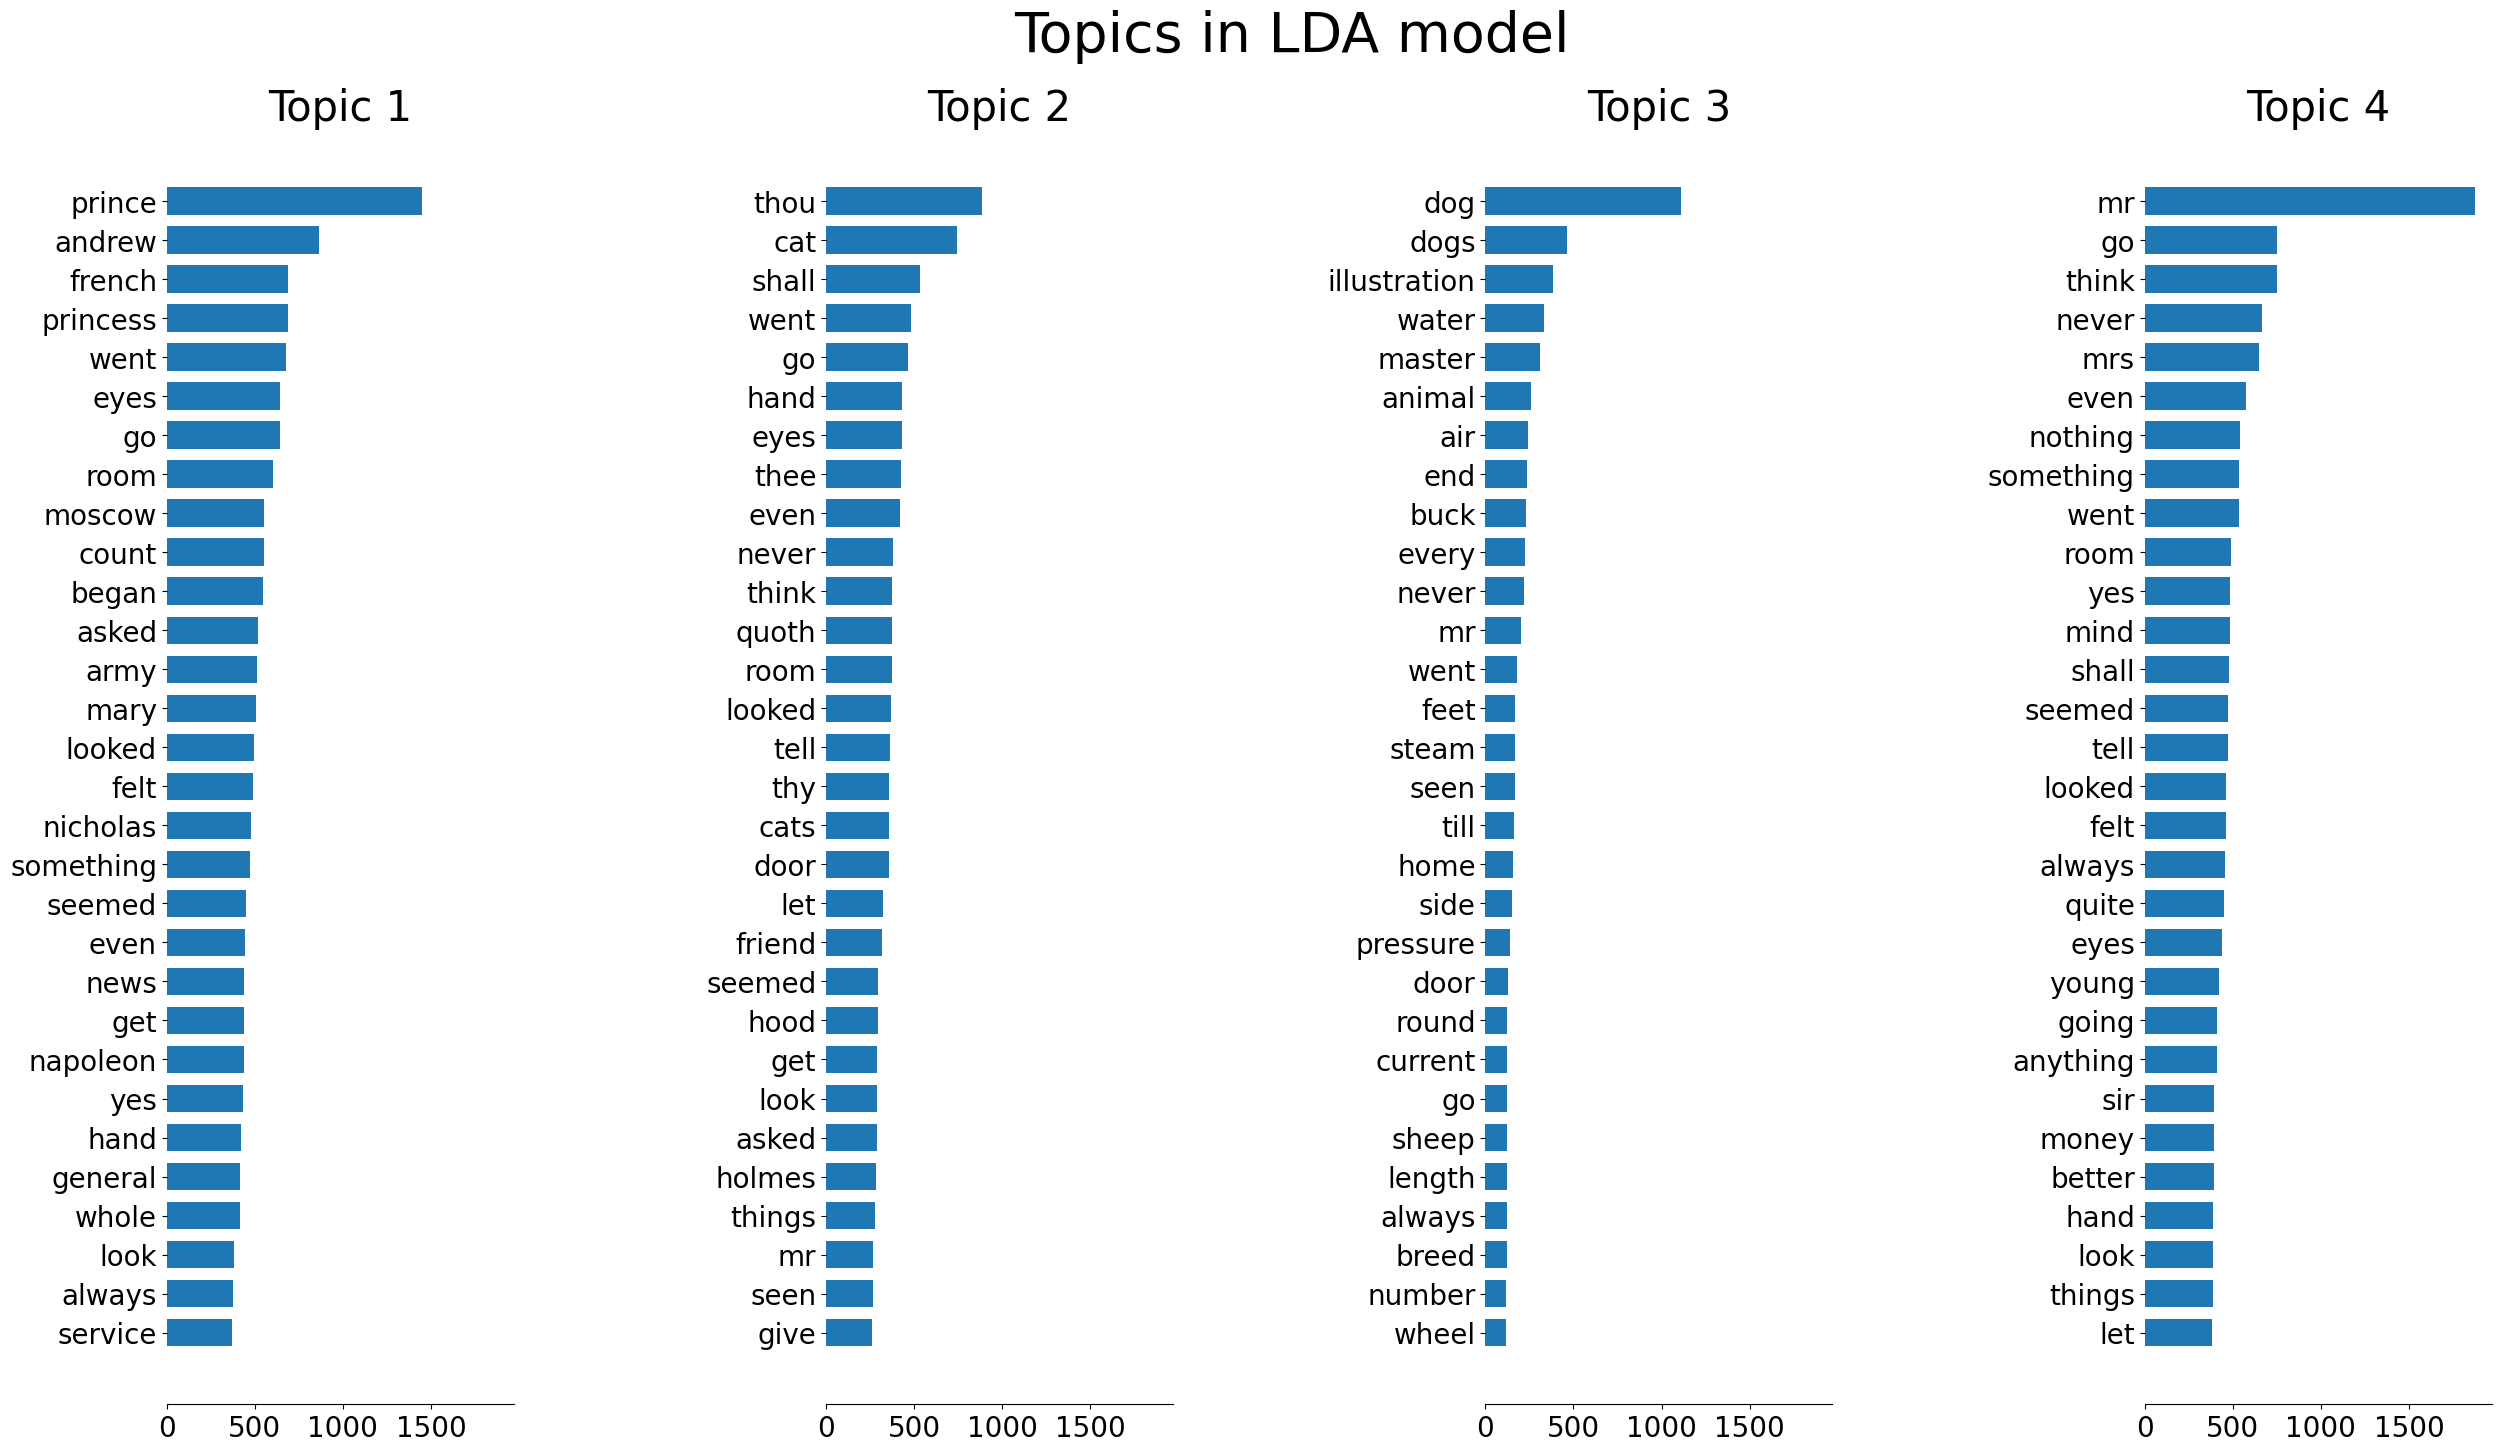

In [231]:
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [232]:
# document topic distribution
doc_topic_dist = lda.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.000015  0.303041  0.000015  0.696929            the_murder.txt
1   0.000009  0.999972  0.000009  0.000009            Robin hood.txt
2   0.000016  0.000016  0.999953  0.000016          how it works.txt
3   0.000093  0.610987  0.388830  0.000090               mammals.txt
4   0.984658  0.000050  0.000002  0.015290           warandpeace.txt
5   0.999963  0.000012  0.000012  0.000012      the online world.txt
6   0.000011  0.413554  0.028157  0.558279       sherlock holmes.txt
7   0.002116  0.000548  0.000006  0.997331  crime and punishment.txt
8   0.257011  0.001471  0.212395  0.529123       sothern_horrors.txt
9   0.001000  0.168087  0.774739  0.056174  the call of the wild.txt
10  0.000007  0.879121  0.000007  0.120864               dracula.txt
11  0.000016  0.685440  0.314529  0.000016              our_cats.txt
12  0.000009  0.000009  0.998507  0.001475     anecdotes of dogs.txt
13  0.000699  0.276816  0.713018  

# Topic Modeling 3: + Lemmatization

## preprocessing the text data

In [233]:
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    filtered_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [234]:
corpus_preprocessed = [preprocess_text(text) for text in corpus]

In [235]:
len(corpus_preprocessed[1])

400063

## Vectorizing the preprocessed text data

In [236]:
corpus_vectorized = tf_vectorizer.fit_transform(corpus_preprocessed)

In [237]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [238]:
print(f"Number of features: {len(tf_feature_names)}")
print(f"First 10 features: {tf_feature_names[:10]}")
print(f"Last 10 features: {tf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['000' '10' '100' '11' '12' '15' '30' '_the' 'abandoned' 'abroad']
Last 10 features: ['wrong' 'wrote' 'ye' 'yellow' 'yes' 'yesterday' 'you' 'young' 'younger'
 'youth']


## Training the LDA model

In [239]:
lda.fit(corpus_vectorized)

LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=0)

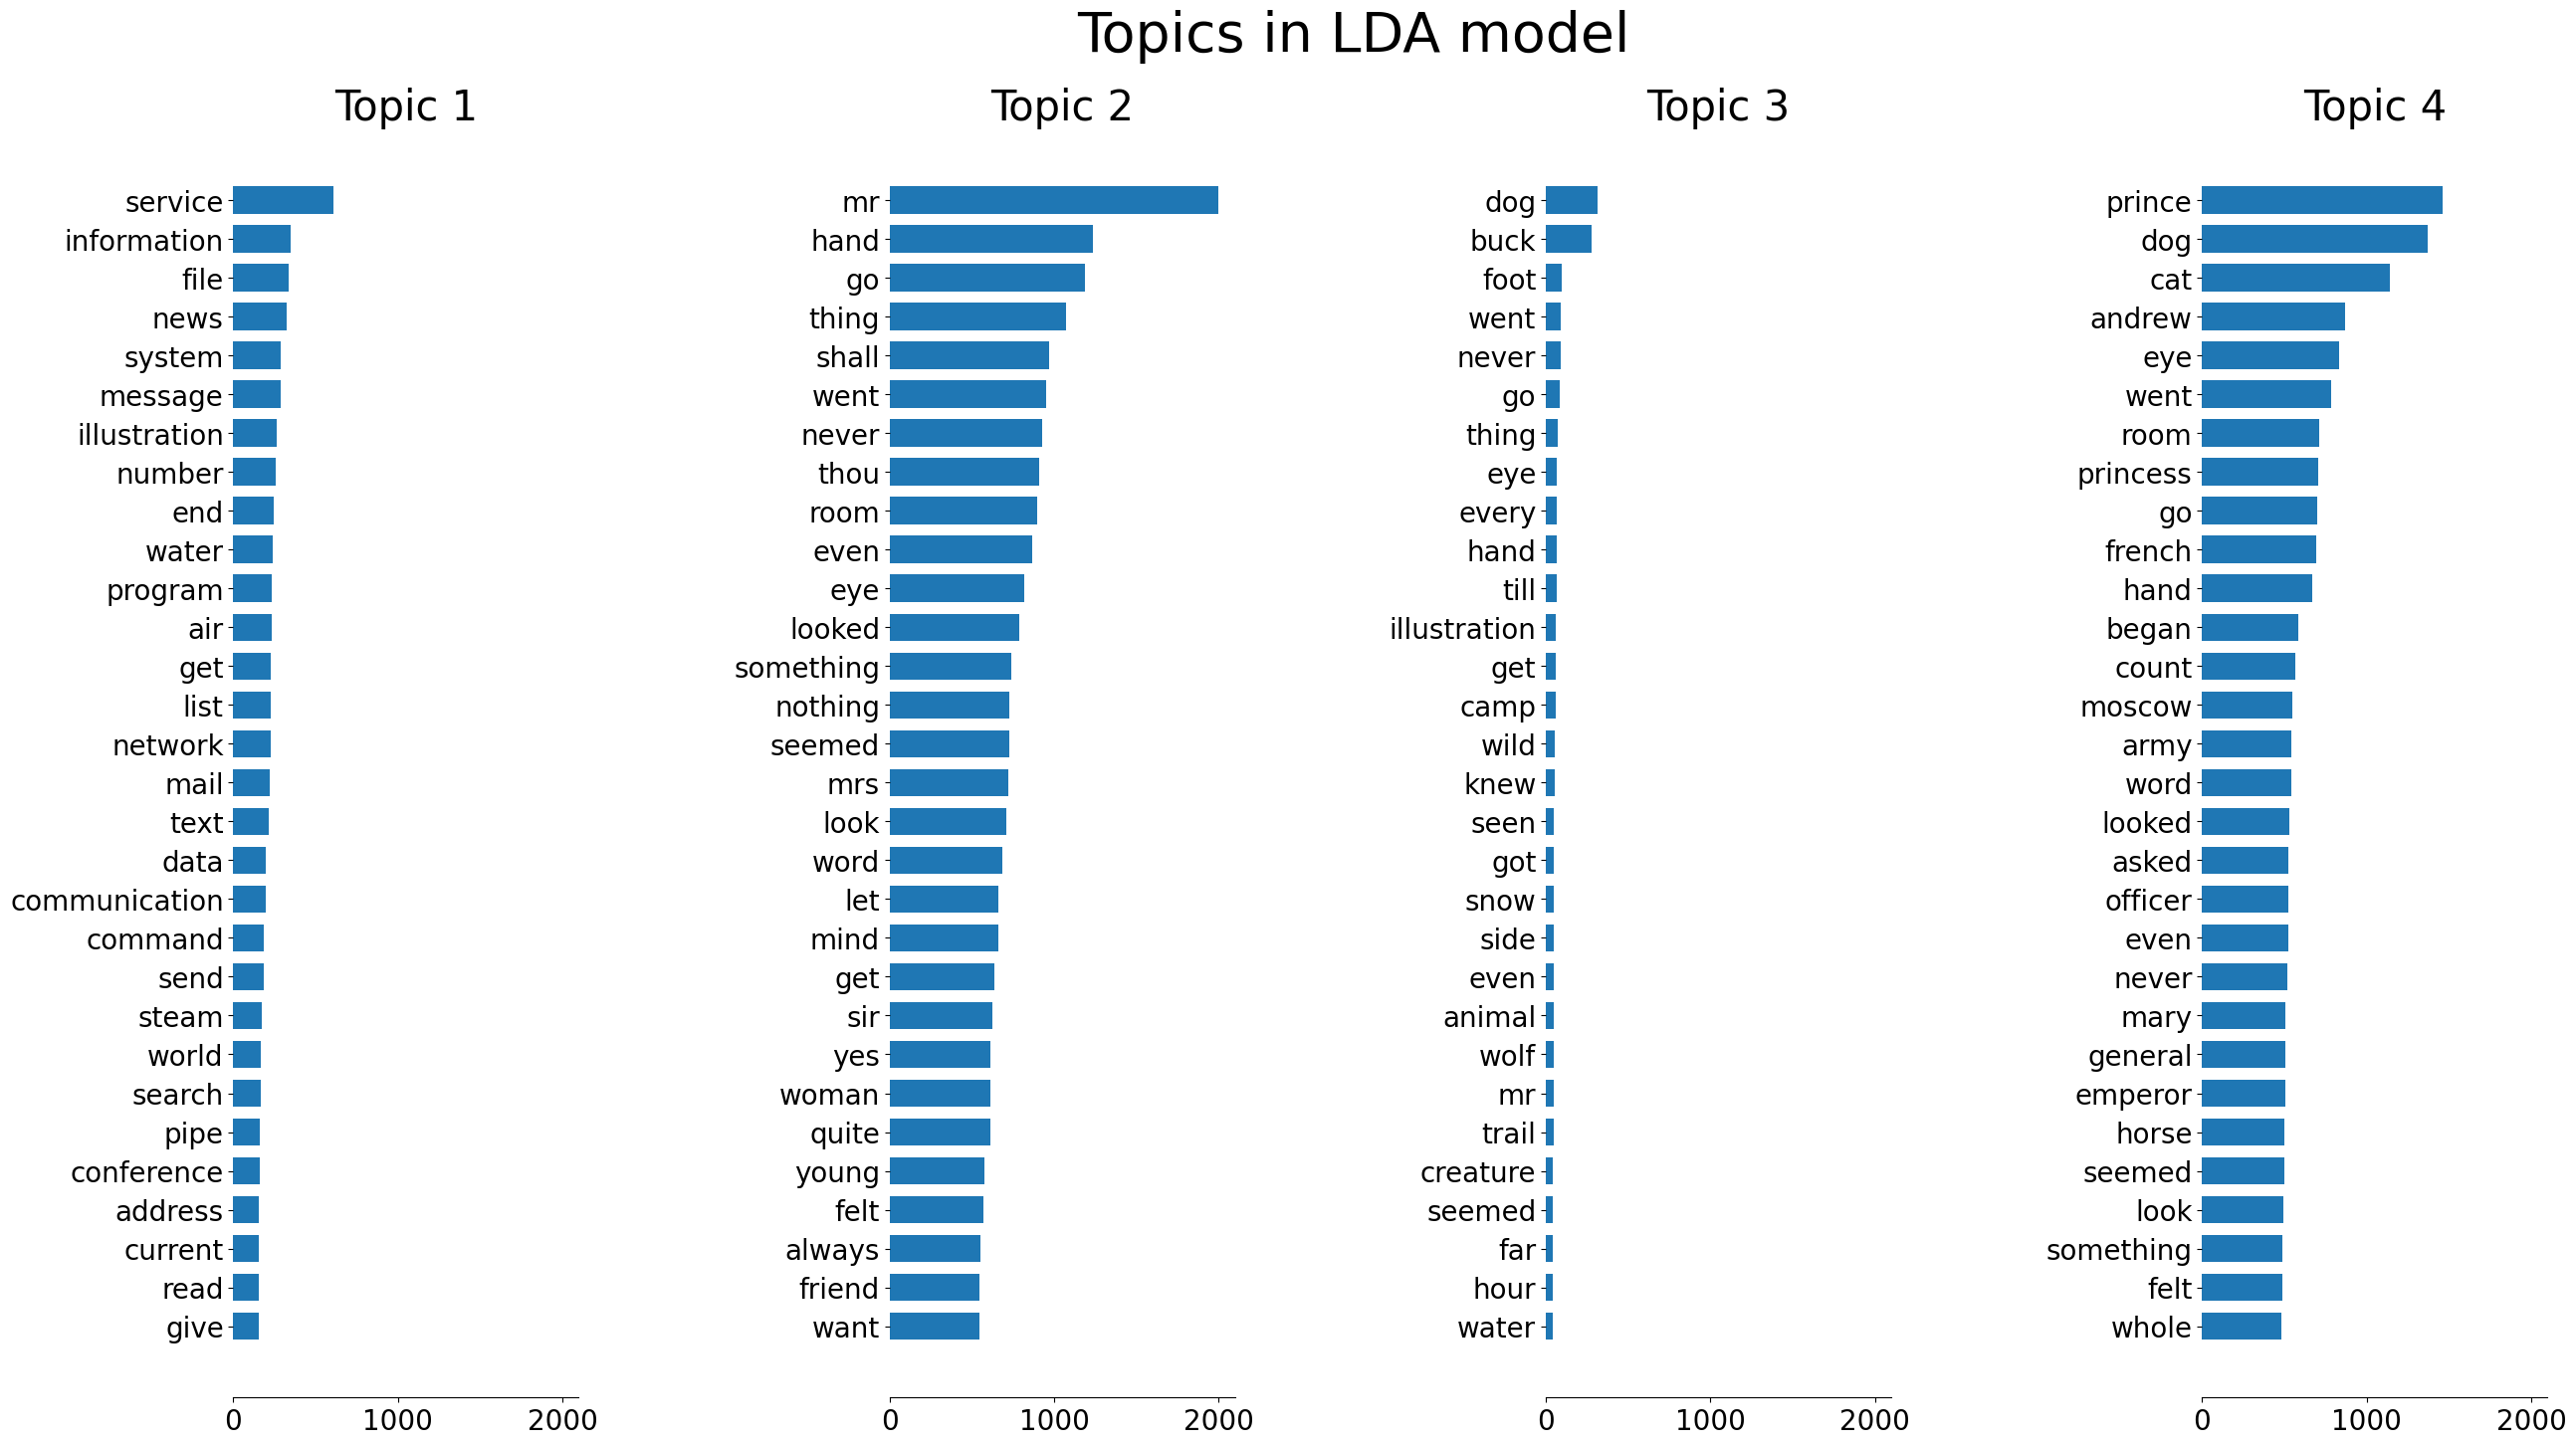

In [240]:
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [241]:
# document topic distribution
doc_topic_dist = lda.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.000375  0.999595  0.000015  0.000015            the_murder.txt
1   0.000009  0.999632  0.000350  0.000009            Robin hood.txt
2   0.999957  0.000014  0.000014  0.000014          how it works.txt
3   0.877172  0.000084  0.122658  0.000085               mammals.txt
4   0.000002  0.001444  0.000002  0.998553           warandpeace.txt
5   0.999967  0.000011  0.000011  0.000011      the online world.txt
6   0.027887  0.969686  0.000677  0.001750       sherlock holmes.txt
7   0.000005  0.992690  0.000006  0.007299  crime and punishment.txt
8   0.362330  0.454333  0.000145  0.183193       sothern_horrors.txt
9   0.000035  0.000035  0.999894  0.000035  the call of the wild.txt
10  0.009219  0.967734  0.022989  0.000057               dracula.txt
11  0.113915  0.002115  0.013200  0.870770              our_cats.txt
12  0.002142  0.000218  0.381318  0.616322     anecdotes of dogs.txt
13  0.010022  0.000027  0.989923  

# Topic Modeling 4: + Entities Masking

## Preprocessing the text data

In [242]:
def preprocess_text(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha:
            if token.ent_type_ in ['PERSON', 'ORG', 'GPE'] or token.pos_ in ['PROPN', 'NUM', 'SYM']:
                filtered_text.append('MASKED')
            elif token.pos_ in ['DET', 'ADP', 'CCONJ', 'PRON', 'AUX', 'PART', 'PUNCT', 'INTJ']:
                continue
            else:
                filtered_text.append(token.lemma_.lower())
    return ' '.join(filtered_text)

In [243]:
nlp.max_length = 4000000

In [244]:
corpus_preprocessed = [preprocess_text(text) for text in corpus]

In [245]:
len(corpus_preprocessed[1])

292692

## Vectorizing the preprocessed text data

In [246]:
corpus_vectorized = tf_vectorizer.fit_transform(corpus_preprocessed)

In [247]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [248]:
print(f"Number of features: {len(tf_feature_names)}")
print(f"First 10 features: {tf_feature_names[:10]}")
print(f"Last 10 features: {tf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['abandon' 'abide' 'abroad' 'absence' 'absent' 'absolute' 'absolutely'
 'absorb' 'abstract' 'absurd']
Last 10 features: ['writer' 'writing' 'wrong' 'ye' 'yellow' 'yesterday' 'yield' 'yon'
 'young' 'youth']


## Training the LDA model

In [249]:
lda.fit(corpus_vectorized)

LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=0)

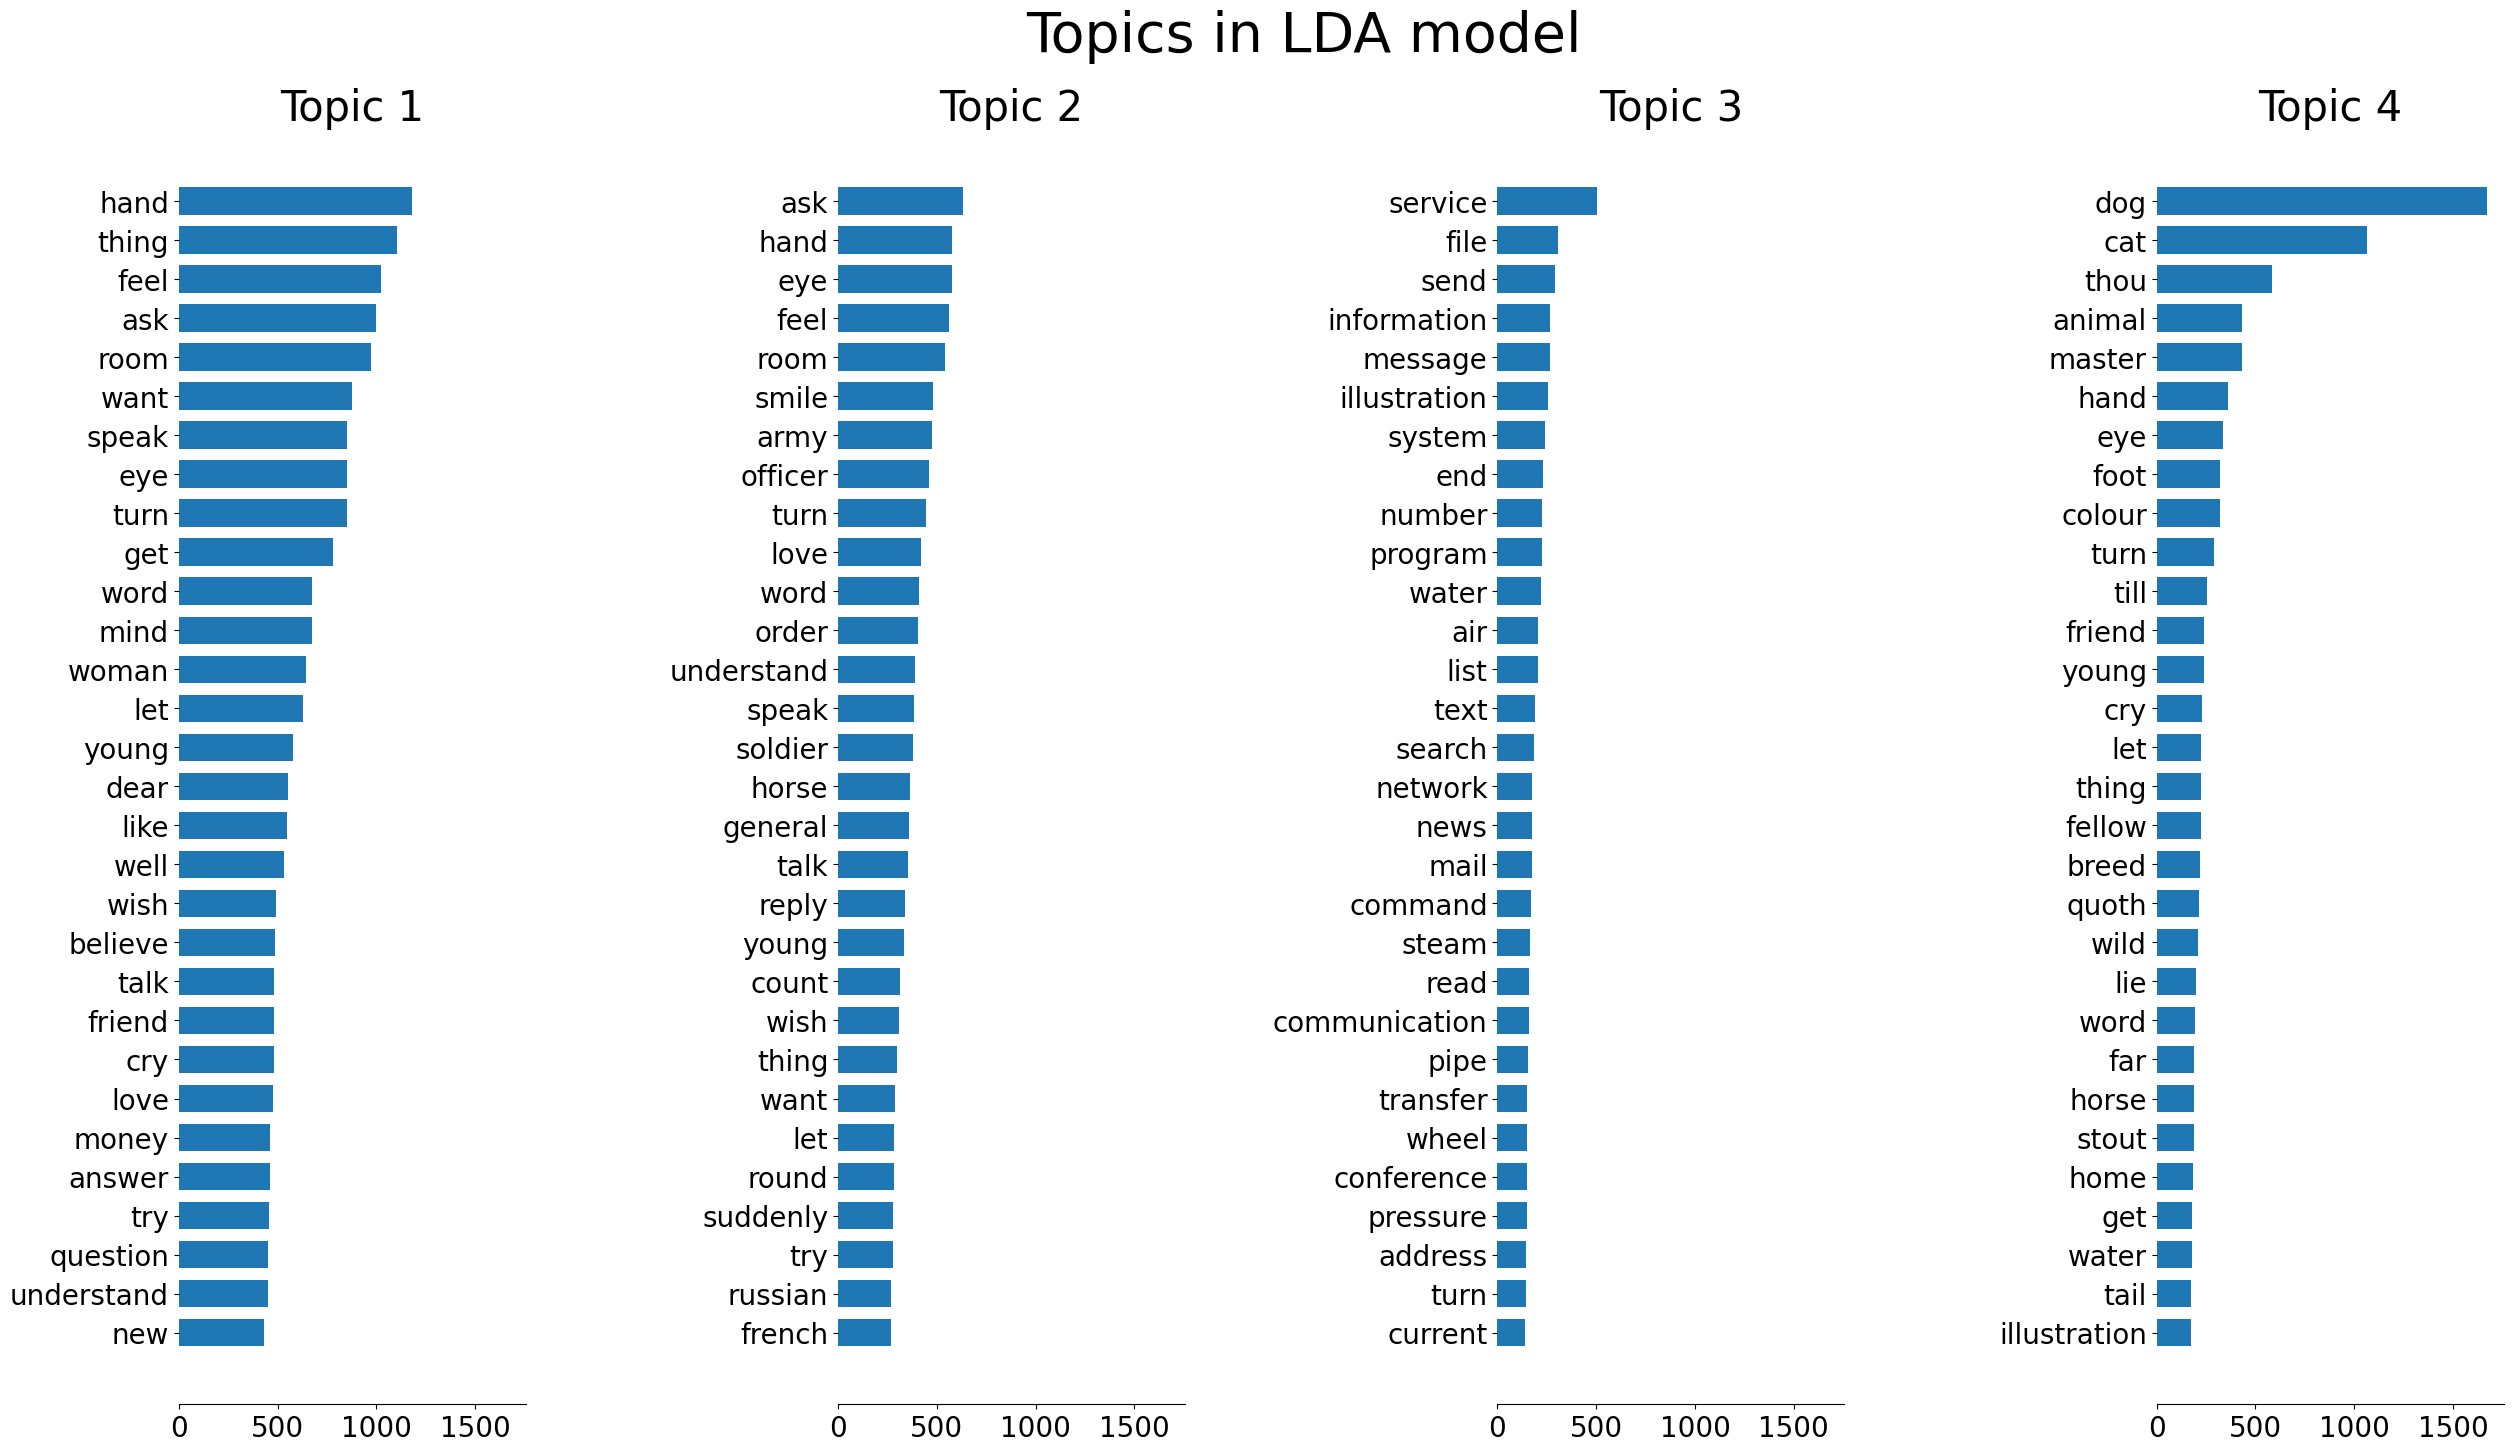

In [250]:
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [251]:
# document topic distribution
doc_topic_dist = lda.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.999939  0.000020  0.000020  0.000020            the_murder.txt
1   0.000012  0.000012  0.000012  0.999965            Robin hood.txt
2   0.000014  0.000014  0.999957  0.000015          how it works.txt
3   0.000121  0.000122  0.443259  0.556498               mammals.txt
4   0.020975  0.979021  0.000002  0.000002           warandpeace.txt
5   0.000013  0.000013  0.999961  0.000013      the online world.txt
6   0.941563  0.000013  0.004996  0.053428       sherlock holmes.txt
7   0.999902  0.000085  0.000006  0.000007  crime and punishment.txt
8   0.696823  0.251218  0.051345  0.000614       sothern_horrors.txt
9   0.090598  0.024046  0.002678  0.882678  the call of the wild.txt
10  0.929237  0.000009  0.000009  0.070745               dracula.txt
11  0.000017  0.000017  0.008020  0.991945              our_cats.txt
12  0.000010  0.000010  0.000010  0.999970     anecdotes of dogs.txt
13  0.080430  0.006391  0.045974  